# DATA 601 Introduction to Data Science (03.7420) SP2020
## Project notebook: Analyzing 2020 crime data of LA city, during COVID-19 pandemic 
## Exploratory Data Analysis using Jupyter and Python3 for data set. This project is the analysis of a data set to answer some of the questions about the data like:

1) What descent groups are more prone to be crime victims? (Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian)

2) What is the frequent crime happening since January 2020? (Battery - simple assault, Burglary, Shoplifting - petty theft ($950 & under), Theft, Aggravated-assault etc.) : Identifying the type of crime can be connected with causes such as unemployment.

### Data source location: https://catalog.data.gov/dataset/crime-data-from-2020-to-present



In [1]:
from io import StringIO
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import requests

# Using requests module to get data from source through URL
# URL below is the download link from source: https://catalog.data.gov/dataset/crime-data-from-2020-to-present
url = "https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD"
s = requests.get(url).content # To read content from csv file
df = pd.read_csv(StringIO(s.decode('utf-8'))) # Decoding the utf-8 format
df

DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0       10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230   
1      190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330   
2      190101087  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       510   
3      191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730   
4      191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415   
5      200100501  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM        30   
6      200100502  01/02/2020 12:00:00 AM  01/02/2020 12:00:00 AM      1315   
7      200100504  01/04/2020 12:00:00 AM  01/04/2020 12:00:00 AM        40   
8      200100507  01/04/2020 12:00:00 AM  01/04/2020 12:00:00 AM       200   
9      200100508  01/04/2020 12:00:00 AM  01/04/2020 12:00:00 AM       900   
10     200100509  01/04/2020 12:00:00 AM  01/04/2020 12:00:00 AM      2200   
11     200100510  01/05/2020 12:00:00 AM  01/05/2020 12:00:00 AM       955   
12     200100514  01/05/2020 12:00:00 AM  01/05/2020 12:00:00 AM      1355   
13     200100515  01/07/2020 12:00:00 AM  01/07/2020 12:00:00 AM      1638   
14     200100520  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      1805   
15     200100522  01/09/2020 12:00:00 AM  01/09/2020 12:00:00 AM      2330   
16     201405970  02/01/2020 12:00:00 AM  02/01/2020 12:00:00 AM      1658   
17     200100531  01/13/2020 12:00:00 AM  01/13/2020 12:00:00 AM      1640   
18     200100535  01/14/2020 12:00:00 AM  01/14/2020 12:00:00 AM      1330   
19     201106871  03/04/2020 12:00:00 AM  03/02/2020 12:00:00 AM      2130   
20     200100538  01/14/2020 12:00:00 AM  01/14/2020 12:00:00 AM      1730   
21     200100543  01/15/2020 12:00:00 AM  01/15/2020 12:00:00 AM      1445   
22     200806856  03/03/2020 12:00:00 AM  03/02/2020 12:00:00 AM      1430   
23     200100546  01/15/2020 12:00:00 AM  01/15/2020 12:00:00 AM       700   
24     200100547  01/15/2020 12:00:00 AM  01/15/2020 12:00:00 AM      1800   
25     200506936  03/09/2020 12:00:00 AM  03/08/2020 12:00:00 AM      1830   
26     200100552  01/19/2020 12:00:00 AM  01/19/2020 12:00:00 AM      2000   
27     200100556  01/20/2020 12:00:00 AM  01/20/2020 12:00:00 AM       400   
28     200100559  01/23/2020 12:00:00 AM  01/23/2020 12:00:00 AM       600   
29     200100565  01/27/2020 12:00:00 AM  01/26/2020 12:00:00 AM      1945   
...          ...                     ...                     ...       ...   
50438  202107911  04/01/2020 12:00:00 AM  03/16/2020 12:00:00 AM       800   
50439  200807994  04/04/2020 12:00:00 AM  04/03/2020 12:00:00 AM      1700   
50440  201409127  04/02/2020 12:00:00 AM  04/02/2020 12:00:00 AM       100   
50441  200109918  03/30/2020 12:00:00 AM  03/30/2020 12:00:00 AM       800   
50442  202007803  03/21/2020 12:00:00 AM  03/21/2020 12:00:00 AM      1640   
50443  201808757  03/26/2020 12:00:00 AM  03/04/2020 12:00:00 AM      2200   
50444  201809195  04/05/2020 12:00:00 AM  04/05/2020 12:00:00 AM      2025   
50445  201908487  04/01/2020 12:00:00 AM  04/01/2020 12:00:00 AM        15   
50446  201210080  03/25/2020 12:00:00 AM  03/22/2020 12:00:00 AM      1130   
50447  201409315  04/06/2020 12:00:00 AM  04/06/2020 12:00:00 AM        25   
50448  200507976  04/06/2020 12:00:00 AM  04/06/2020 12:00:00 AM       153   
50449  201210387  04/06/2020 12:00:00 AM  04/06/2020 12:00:00 AM        15   
50450  200109709  03/26/2020 12:00:00 AM  03/26/2020 12:00:00 AM      1150   
50451  200309252  03/30/2020 12:00:00 AM  03/02/2020 12:00:00 AM      2000   
50452  201108059  04/06/2020 12:00:00 AM  03/06/2020 12:00:00 AM       150   
50453  200407439  03/31/2020 12:00:00 AM  03/31/2020 12:00:00 AM       900   
50454  200407591  04/05/2020 12:00:00 AM  04/04/2020 12:00:00 AM        10   
50455  200309249  03/30/2020 12:00:00 AM  03/30/2020 12:00:00 AM      2200   
50456  201308796  03/28/2020 12:00:00 AM  03/28/2020 12:00:00 AM       915   
50457  201305848  02/02/2020 12:0

In [2]:
# The isnull() will return True/ False if the cell has null values. sum() is used to add the number of null values
df.isnull().sum()

DR_NO                 0
Date Rptd             0
DATE OCC              0
TIME OCC              0
AREA                  0
AREA NAME             0
Rpt Dist No           0
Part 1-2              0
Crm Cd                0
Crm Cd Desc           0
Mocodes            5241
Vict Age              0
Vict Sex           4952
Vict Descent       4952
Premis Cd             1
Premis Desc          19
Weapon Used Cd    29828
Weapon Desc       29828
Status                0
Status Desc           0
Crm Cd 1              0
Crm Cd 2          43658
Crm Cd 3          47143
Crm Cd 4          47248
LOCATION              0
Cross Street      38860
LAT                   0
LON                   0
dtype: int64

In [3]:
# Replacing all the empty data with np.nan (Numpy-NaN float value) for imputating missing data if necessary
df['Mocodes'].fillna(np.nan, inplace=True)
df['Vict Sex'].fillna(np.nan, inplace=True)
df['Vict Descent'].fillna(np.nan, inplace=True)
df['Premis Cd'].fillna(np.nan, inplace=True)
df['Premis Desc'].fillna(np.nan, inplace=True)
df['Weapon Used Cd'].fillna(np.nan, inplace=True)
df['Weapon Desc'].fillna(np.nan, inplace=True)
df['Crm Cd 2'].fillna(np.nan, inplace=True)
df['Crm Cd 3'].fillna(np.nan, inplace=True)
df['Crm Cd 4'].fillna(np.nan, inplace=True)
df['Cross Street'].fillna(np.nan, inplace=True)

### According to demographics of Los Angeles city, Hispanic/Latin population is approximately half of the city population. So there is a high chance of Hispanic/Latin being most of the victims.
(Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian)

From the plot below, we draw the following conclusions:
1. People of "Hispanic/latin descent are more prone to become a crime victim.
2. Cambodian natives living in the city are the least of being a crime victim.

### The second bar plot shows, of all the people in Los Angeles city, chances of being a crime victim is higher for males.

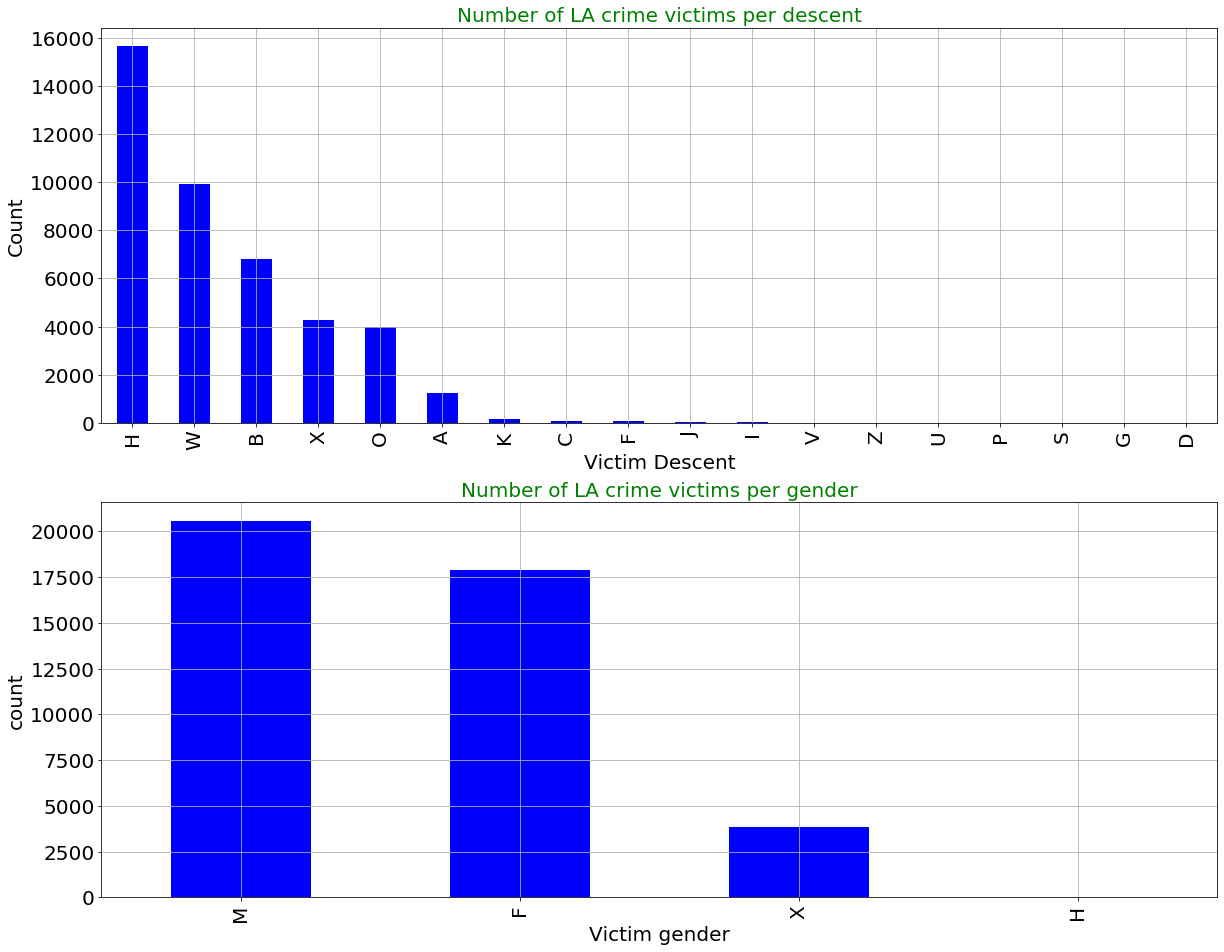

In [4]:
# df['Vict Descent'] contains pandas series of victim descent information.
# value_counts() will return the count of values in the pandas series above.
plt.subplot(2,1,1)
df['Vict Descent'].value_counts().plot(kind='bar',figsize=(20,16),color='blue',fontsize=20)
plt.title('Number of LA crime victims per descent',color='green',size=20)
plt.grid()
plt.xlabel('Victim Descent', size=20)
plt.ylabel('Count', size=20)
plt.subplot(2,1,2)
df['Vict Sex'].value_counts().plot(kind='bar',figsize=(20,16),color='blue',fontsize=20)
plt.title('Number of LA crime victims per gender',color='green',size=20)
plt.xlabel('Victim gender', size=20)
plt.ylabel('count', size=20)
plt.grid()

### The graphs shows the count of crimes in top 30 premises of Los Angeles city. Most number of crimes are happening on the STREET followed by "Single family dwelling", "Apartments", "Sidewalks","Parking lots" etc.
### From the second graph, it is clear that, although crimes are highest in 77th street and Central part of LA, it is not uncommon in other parts of the city.

Text(0, 0.5, 'Count')

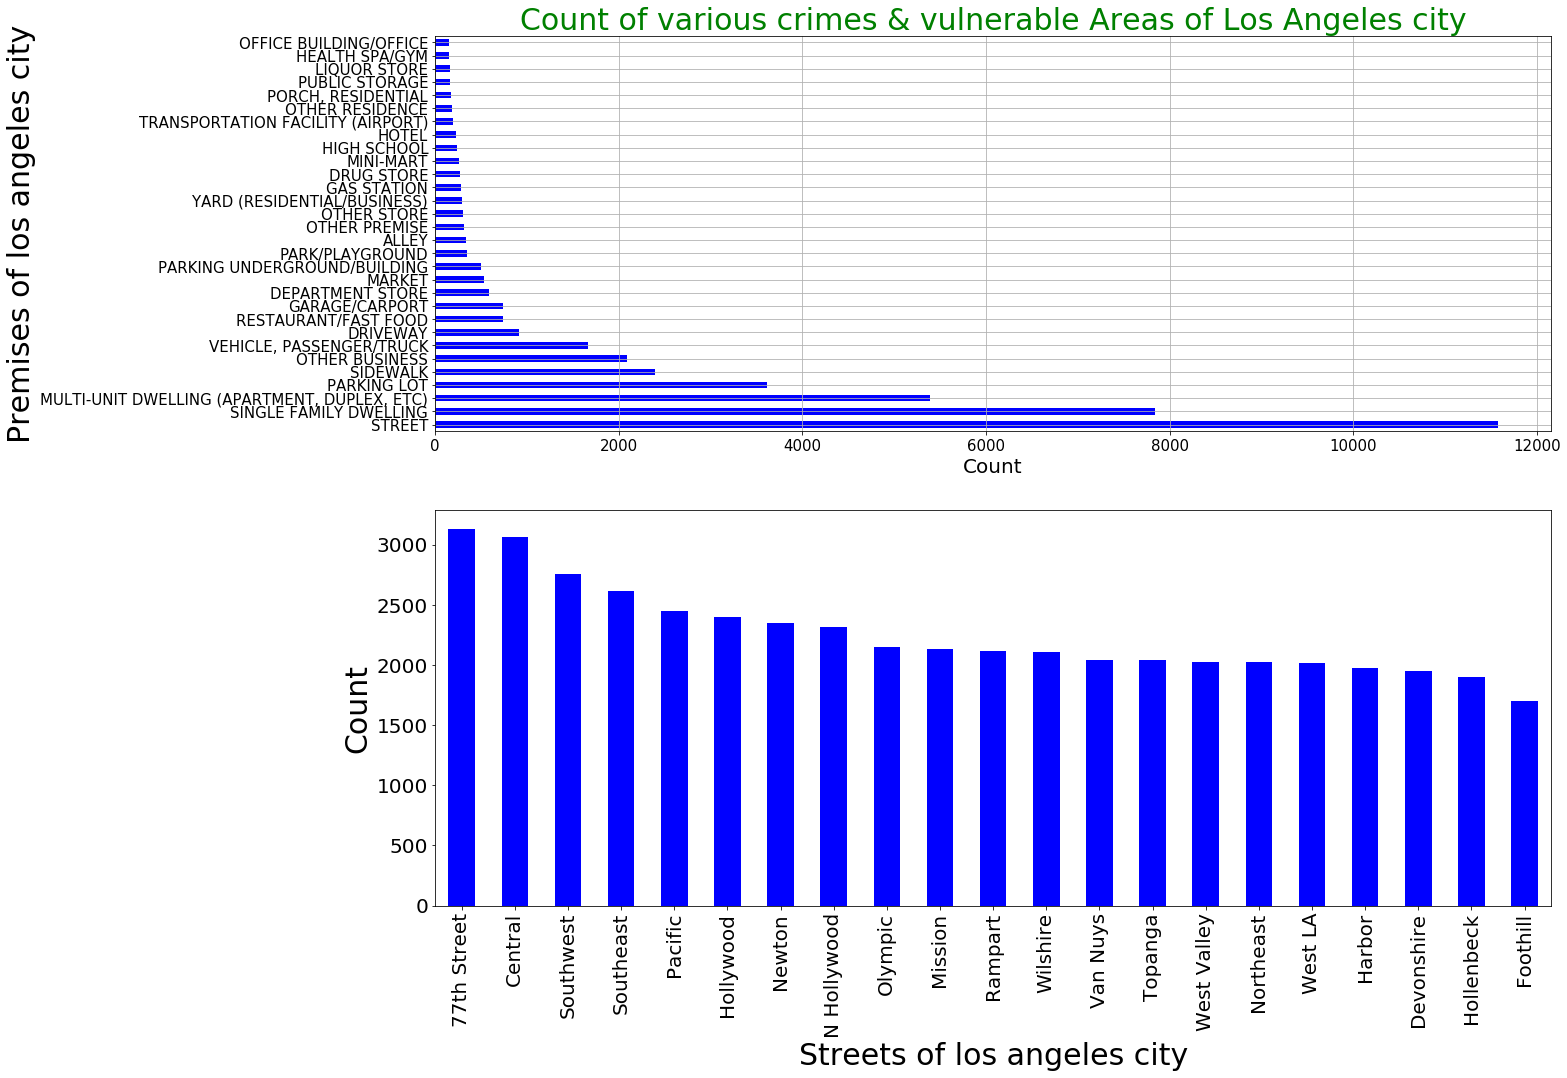

In [5]:
# value_counts() will return the count of values in the pandas series above.
plt.subplot(2,1,1)
df['Premis Desc'].value_counts()[:30].plot(kind='barh',figsize=(20,16),color='blue',fontsize=15)
plt.title('Count of various crimes & vulnerable Areas of Los Angeles city',color='green',size=30)
plt.xlabel('Count',size=20)
plt.ylabel('Premises of los angeles city', size=30)
plt.grid()
plt.subplot(2,1,2)
df['AREA NAME'].value_counts().plot(kind='bar',figsize=(20,16),color='blue',fontsize=20)
plt.xlabel('Streets of los angeles city',size=30)
plt.ylabel('Count',size=30)

### We can see from the below bar plot, that the crime rate has been inconsistent from January,2020 to mid-February,2020 but it shows decline in crimes from March,2020.
#### Analysis:
-> Since most crimes of LA in 2020 were happened on the "STREET", due to covid-19 and lockdown situation in california state, public gatherings on streets was reduced which might be the primary reason for low crime in march.

Text(0, 0.5, 'Count')

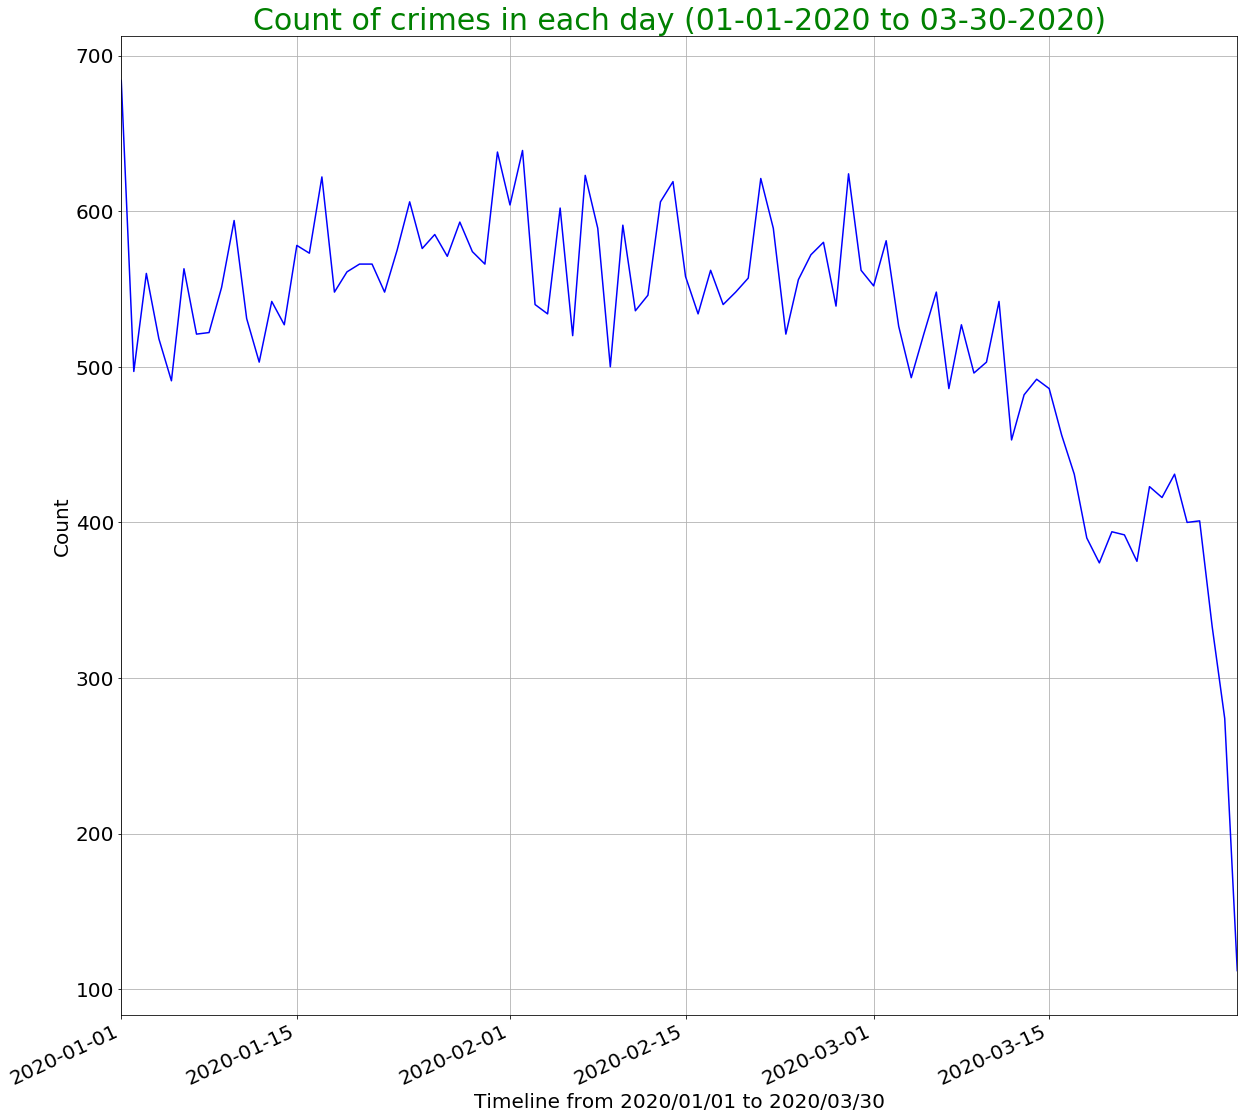

In [6]:
# The date of occurance from 'DATE OCC' column which is in 'str' format is converted to timestamp format for sorting.
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Value_counts() returns the count of number of occurances of the date
df['DATE OCC'].value_counts().plot(kind='line',figsize=(20,20),color='blue',fontsize=20)
plt.grid()
plt.xticks(rotation=25)
plt.title('Count of crimes in each day (01-01-2020 to 03-30-2020)',color='green',size =30)
plt.xlabel('Timeline from 2020/01/01 to 2020/03/30', size=20)
plt.ylabel('Count', size=20)

### From the bar plot below, we have the findings: 
-> In a typical day, most of the crimes happen at 12:00PM followed by 6:00PM and 8:00PM.

Text(0, 0.5, 'Count')

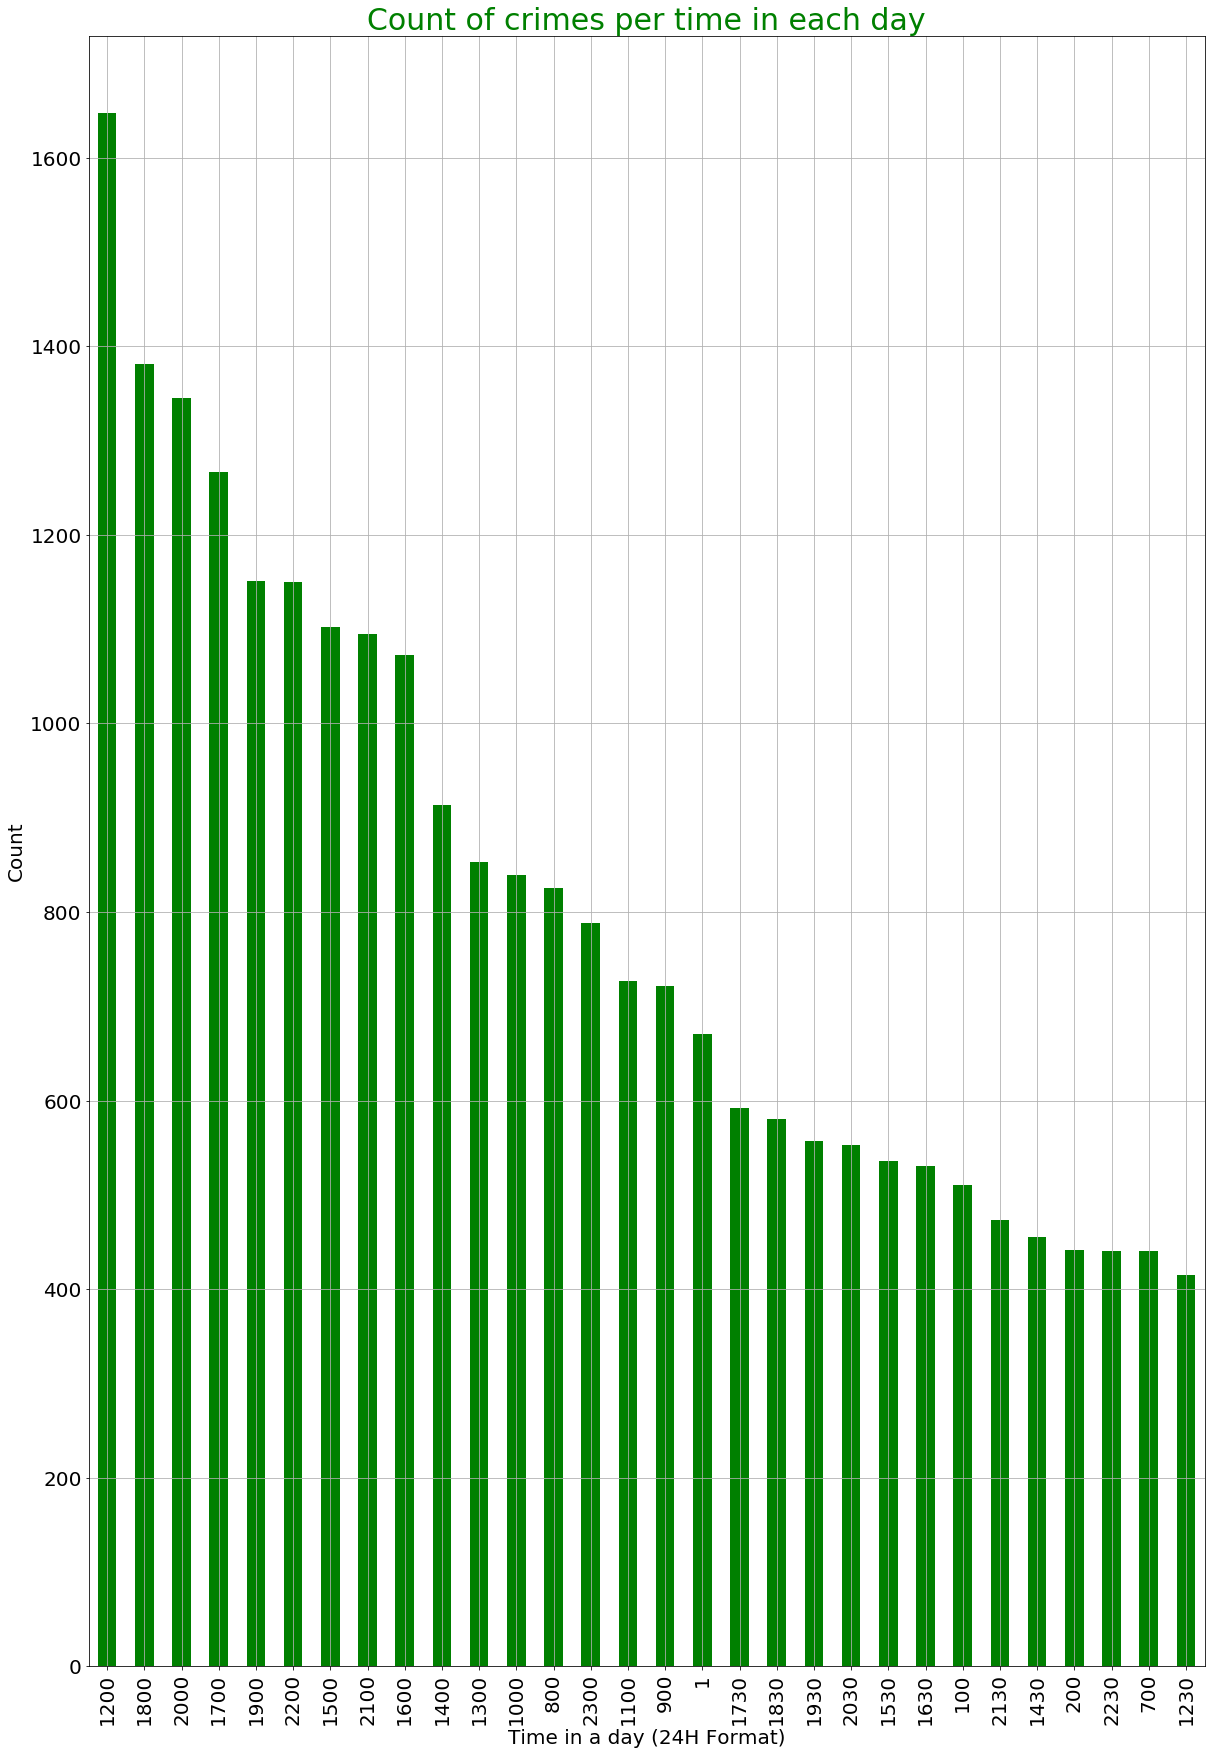

In [7]:
df['TIME OCC'].value_counts()[:30].plot(kind='bar',figsize=(20,30),color='green',fontsize=20)
plt.grid()
plt.title('Count of crimes per time in each day',color='green',size =30)
plt.xlabel('Time in a day (24H Format)',size=20)
plt.ylabel('Count', size=20)

### Figure shows the bar plot of top 50 crimes in Los Angeles city, of which "Battery simple assualt" is the most happened crime followed by "vehicle stolen" and "Bulgary from Vehicle"

Text(0, 0.5, 'Crimes')

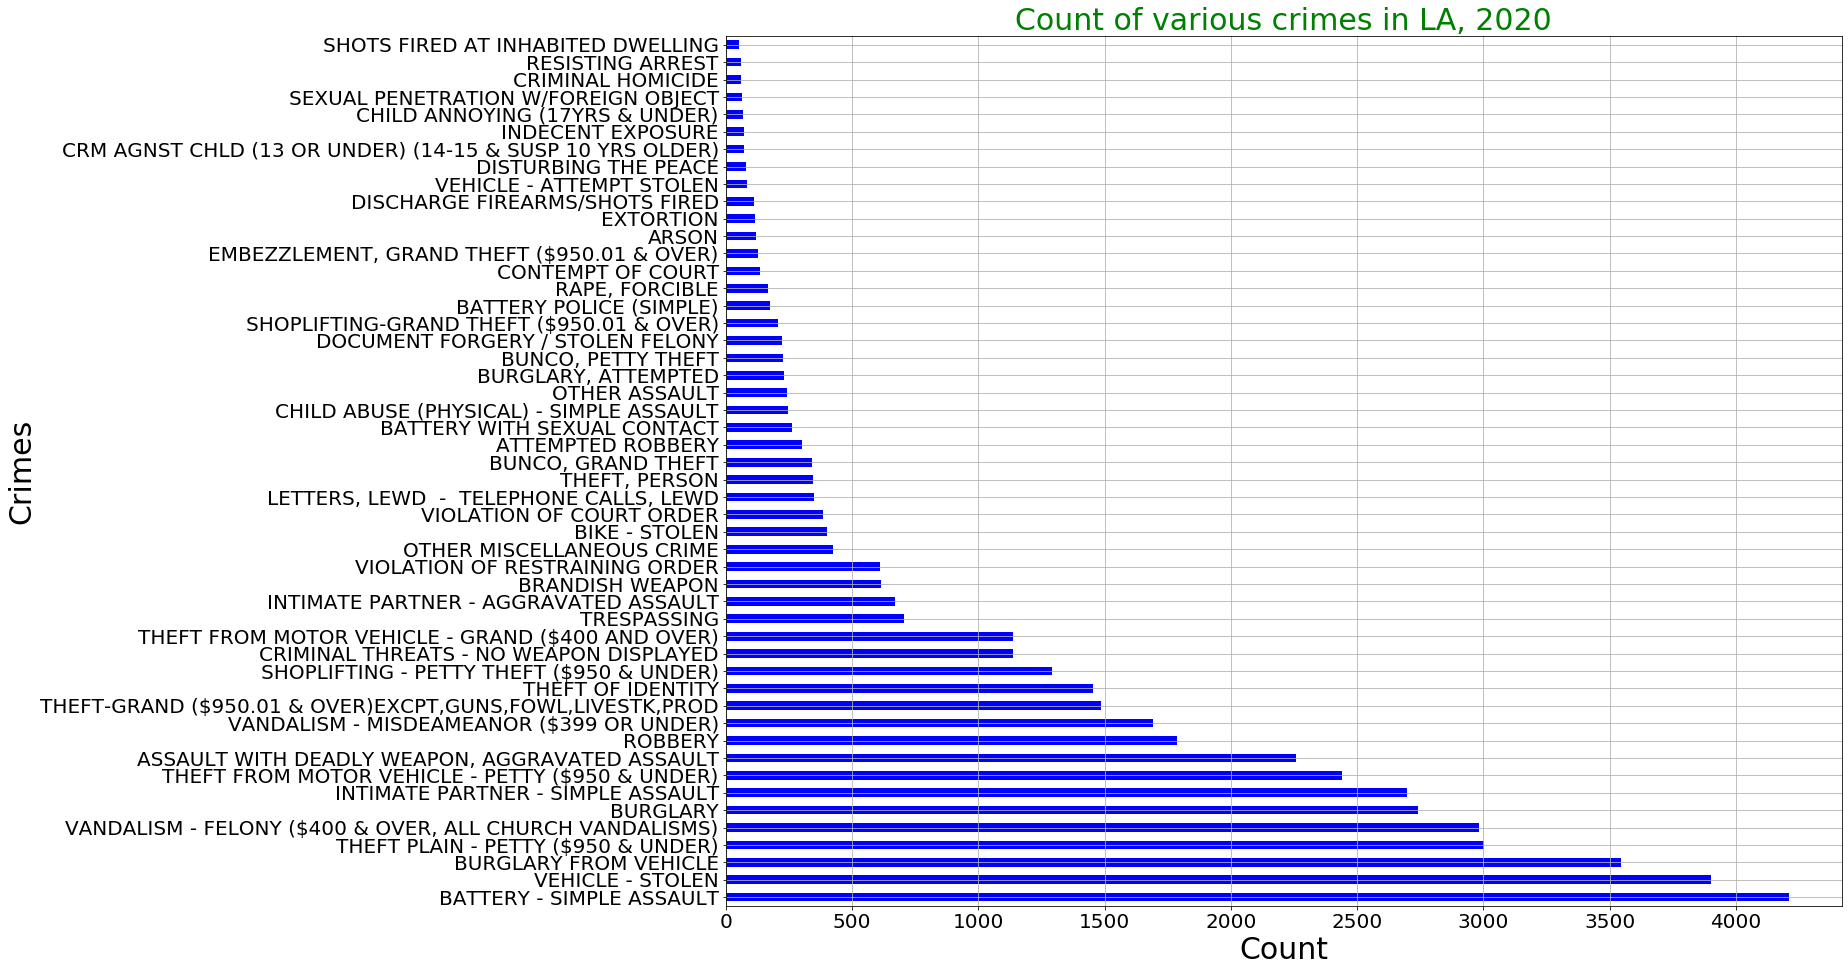

In [8]:
# Value_counts() returns the count of occurances of each crime in LA
df['Crm Cd Desc'].value_counts()[:50].plot(kind='barh',figsize=(20,16),color='blue',fontsize=20)
plt.title('Count of various crimes in LA, 2020',color='green',size=30)
plt.grid()
plt.xlabel('Count',size=30)
plt.ylabel('Crimes',size=30)